In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import shutil
import re

## 

## 1.C

In [12]:
current_path= Path().absolute()         # current path
test_path= current_path/"test"/"test"   # path to the test data
train_path= current_path/"train"/"train"    # path to train data

In [13]:
original_data_path= current_path/ "original_data"   # original data folder path
original_data_path.mkdir(exist_ok=True)             # making the folder

In [14]:
if test_path.exists():  # if the folders exist in test test, then move it to original
    shutil.move(test_path, original_data_path)
if train_path.exists():
    shutil.move(train_path, original_data_path)

In [15]:
experimental_small= current_path/"experiment_small_data"
experimental_small.mkdir(exist_ok=True)

In [19]:
folders_delete = [  # list of folders to delete
    current_path / "test",
    current_path / "train",
]

for folder in folders_delete:   # delete folder if it exists
    if folder.exists():
        shutil.rmtree(folder)

## 1.A/B

In [ ]:
original_data= current_path/"original_data" # path original data
test_data= original_data/"test" # new test data
train_data= original_data/"train"   # new train data

In [22]:
train_tuple= list(train_data.iterdir())  # tuple of the image paths
pictures= np.random.choice(train_tuple, 10)  # ten random paths

In [23]:
pattern = r"\b\w{3}\b"  # pattern for dog or cat
labels = [re.findall(pattern, path.name)[0] for path in pictures]   # regx to find pattern in the file name of the path 0 to take name and not jpg (first match)

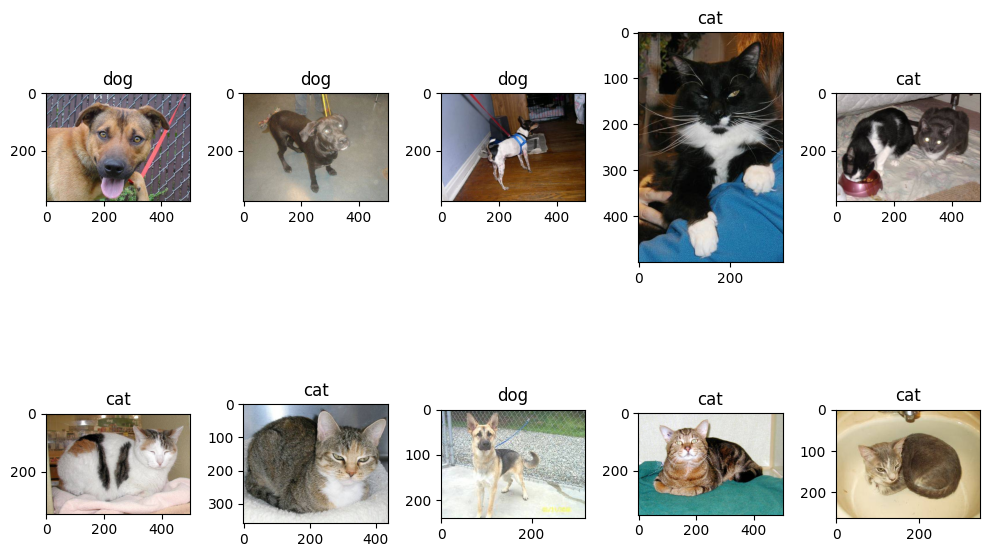

In [24]:


fig, axes= plt.subplots(2, 5, figsize= (10,7))       
for i, ax in enumerate(axes.flatten()):
    image_path= train_data/f"{pictures[i]}"   # image math for the current number in the list
    image= plt.imread(image_path)       # reads as image
    ax.imshow(image)                    # showing image
    ax.set_title(labels[i])
    
fig.tight_layout()  

## 1.D

In [56]:
total_dogs= [dog for dog in train_tuple if 'dog' in dog.name]   # picking out all dogs
np.random.shuffle(total_dogs)   # shuffle
animal_needed= 1250

dogs= total_dogs[:animal_needed]    # picking number of dogs we need
print(f"Dogs: {len(dogs)}") # check if correct

"""Same thins for cats"""
total_cats= [dog for dog in train_tuple if 'cat' in dog.name]
np.random.shuffle(total_cats)
animal_needed= 1250

cats= total_cats[:animal_needed]
print(f"Cats: {len(cats)}")

Dogs: 1250
Cats: 1250
